In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
os.chdir(os.path.join('..','data'))
df = pd.read_csv(r'2002FemPreg.csv',low_memory=False)

In [5]:
# taking only live births data
df = df[['caseid','prglngth','outcome','pregordr','birthord','totalwgt_lb','agepreg','finalwgt']]

In [8]:
df_live = df[df['outcome']==1]

Text(0.5,0,'pregnency length in weeks')

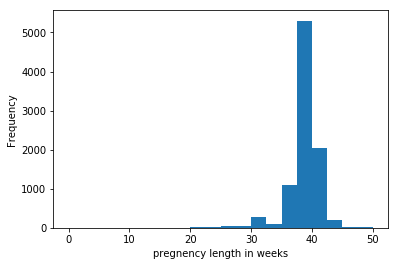

In [11]:
df_live['prglngth'].plot.hist(bins=20)
plt.xlabel('pregnency length in weeks')
# negatively skewed normal distribution

Text(0.5,0,"mother's age during pregnency")

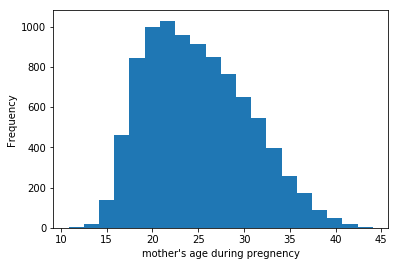

In [13]:
df_live['agepreg'].plot.hist(bins=20)
plt.xlabel('mother\'s age during pregnency')
# Positively skewed normal distribution

In [24]:
# look for outliers
prglngth_values = df_live['prglngth'].value_counts()
agepreg_values = df_live['agepreg'].value_counts(sort=True)

prglngth_values.sort_index(ascending=False)

# mostly if preglength increases 42 weeks then doctors recomment induced labour.50 weeks is medically unlikely.
# best way to handle outliers depends on 'domain knowledge'. meaning of the data where it came from.
# in this analysis we are going to analyse only pregnency more than 27 weeks

50       2
48       7
47       1
46       1
45      10
44      46
43     148
42     328
41     587
40    1116
39    4693
38     607
37     455
36     321
35     311
34      60
33      49
32     115
31      27
30     138
29      21
28      32
27       3
26      35
25       3
24      13
23       1
22       7
21       2
20       1
19       1
18       1
17       2
13       1
9        1
4        1
0        1
Name: prglngth, dtype: int64

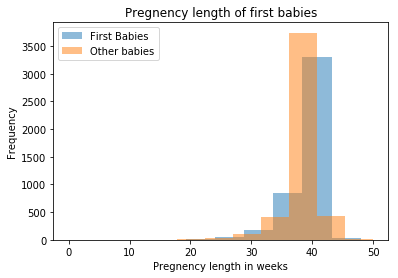

In [64]:
# compare the distribution of pregnency length of 1st babies and others 
first_babies = df_live[df_live['birthord']==1]['prglngth']
other_babies = df_live[df_live['birthord']!=1]['prglngth']

fig,ax1 = plt.subplots()
first_babies.plot.hist(ax=ax1,alpha=0.5,label='First Babies',bins=10)
# increase the transperency of the plts
other_babies.plot.hist(ax=ax1,alpha=0.5,label='Other babies',bins=10)
ax1.set_xlabel('Pregnency length in weeks')
ax1.set_title('Pregnency length of first babies')
plt.legend()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


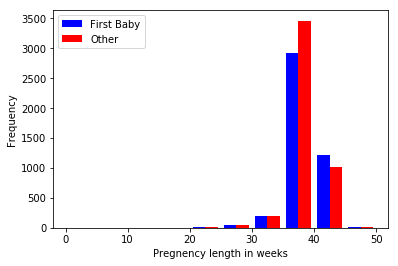

In [49]:
# plotting the distribution side-by-side for easy comparison
labels = ['First Baby','Other']
colors = ['blue','red']
plt.hist([first_babies,other_babies],label=labels,color=colors)
plt.xlabel('Pregnency length in weeks')
plt.ylabel('Frequency')
plt.legend()

In [50]:
# histogram is good for comparing two distribution but in this example, we have different sample sizes for first
# and the other babies. Hence we have to compare using probability mass functions

# Summary statistics
# 1. central tendency: do the values tend to cluster around particular point
# 2. modes
# 3. spread/variability
# 4. tails - how quickly probabilities drop off as we move from the modes
# 5. outliers

In [51]:
# pregnency length 
df_live['prglngth'].describe()

count    9148.000000
mean       38.560560
std         2.702344
min         0.000000
25%        39.000000
50%        39.000000
75%        39.000000
max        50.000000
Name: prglngth, dtype: float64

In [62]:
import math
# effect size using cohen's d
pooled_diff_mean = first_babies.mean() - other_babies.mean()
n1 = len(first_babies)
n2 = len(other_babies)
var1 = first_babies.var()
var2 = other_babies.var()
pooled_var = (n1*var1+n2*var2)/(n1+n2)
cohen_d = pooled_diff_mean/math.sqrt(pooled_var)
cohen_d
# this effect size is very small statiscally

0.028879044654449883